Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from glob import glob
import re
from statsmodels.formula.api import ols

## Dataset 1

Importing dataset 1 and storing it as dataframe df1

In [2]:
df1 = pd.read_csv('data/data1.txt', index_col='yrmo', parse_dates=True).sort_index()
df1.index.name = 'Date'
df1.shape

(42074, 7)

In [3]:
df1.columns = [i.lower() for i in df1.columns]
df1.head()

,physicianid,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
Date,,,,,,,
2015-01-01,6vFQfkVIyHglLHjv,NaN,NaN,4.0,2439.0,2.0,2.0
2015-01-01,KtIQV9FihhozcS4O,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,nh9P8B7ik2qYlruB,6.0,791.0,9.0,5760.0,3.0,174.0
2015-01-01,1fZbRx3Qm2h2rmPP,NaN,NaN,1.0,97.0,NaN,NaN
2015-01-01,UY8bW4koFtgJI8J7,10.0,16299.0,NaN,NaN,NaN,NaN


#### Counts for non-null values within medication groups matched except for antobiopayments & antibiopatients 

In [4]:
df1.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42074 entries, 2015-01-01 to 2017-10-01
Data columns (total 7 columns):
physicianid         42074 non-null object
adderallpatients    23889 non-null float64
adderallpayments    23889 non-null float64
antibiopatients     39829 non-null float64
antibiopayments     39826 non-null float64
opioidpatients      12588 non-null float64
opioidpayments      12588 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.6+ MB


In [5]:
# Imputing the missing antibiopayments values

df1['antibiopayments'][df1['antibiopayments'].isnull() & df1['antibiopatients'].notnull()] = 0
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42074 entries, 2015-01-01 to 2017-10-01
Data columns (total 7 columns):
physicianid         42074 non-null object
adderallpatients    23889 non-null float64
adderallpayments    23889 non-null float64
antibiopatients     39829 non-null float64
antibiopayments     39829 non-null float64
opioidpatients      12588 non-null float64
opioidpayments      12588 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.6+ MB


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Exploratory data analysis with visualizations
While the data was signifcantly right-skewed, there were no unexpected outliers

In [6]:
df1.describe() # Data is significantly right skewed, however, there were no unexpected outliers

,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
count,23889.000000,2.388900e+04,39829.000000,3.982900e+04,12588.000000,1.258800e+04
mean,4.921972,1.828657e+03,6.378217,2.166645e+04,3.095249,2.980236e+03
std,9.248193,2.293074e+04,12.741038,8.379241e+04,6.943019,6.421729e+04
min,1.000000,-1.177100e+04,1.000000,-9.400000e+03,0.000000,-1.000000e+01
25%,1.000000,4.600000e+01,2.000000,3.020000e+02,1.000000,1.500000e+01
50%,3.000000,2.450000e+02,3.000000,2.906000e+03,2.000000,1.220000e+02
75%,5.000000,8.580000e+02,6.000000,1.430000e+04,3.000000,4.410000e+02
max,341.000000,1.732264e+06,285.000000,2.423404e+06,318.000000,2.823021e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226389604A8>,
      dtype=object)

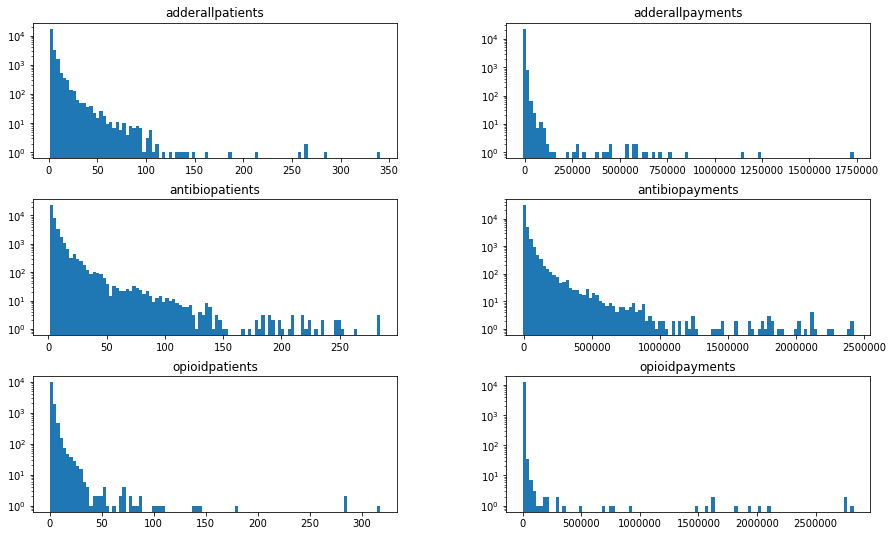

In [7]:
df1.hist(bins=100, figsize=(15,9), grid=False, log=True)

Entries for the month of 2017-10 were incomplete and will be excluded from subsequent analyses

In [8]:
df1.groupby('Date').sum().tail() 

,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
Date,,,,,,
2017-06-01,2124.0,517995.0,4613.0,16622137.0,575.0,105434.0
2017-07-01,1656.0,468758.0,4231.0,15072131.0,480.0,92645.0
2017-08-01,1581.0,445137.0,3295.0,10346447.0,530.0,285853.0
2017-09-01,1257.0,350291.0,2604.0,8705042.0,317.0,52527.0
2017-10-01,6.0,1681.0,10.0,690.0,0.0,0.0


### Time series visualization of patient volume and payments 

In [9]:
# Grouping the data by date. 
df1_d = df1.loc[:'2017-09',:].groupby('Date').sum()

Time series plot of total patients and payments per month for all physicians per drug type shows declining patient volumes for antibiotics and antibiotic payments overtime. However, although the volumes for adderall and opioids patients is declining, the payments seem stationary.

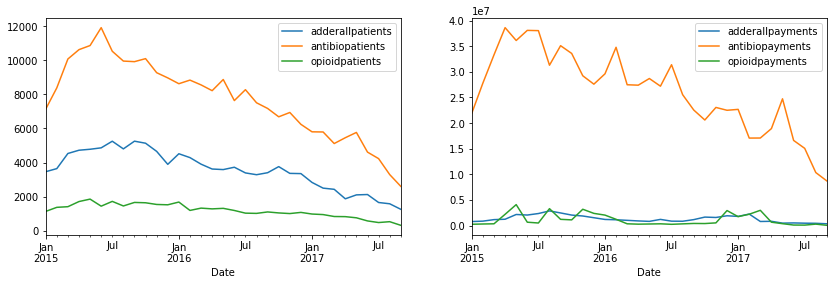

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14,4), squeeze=False)
df1_d.loc[:,['adderallpatients','antibiopatients','opioidpatients']].plot(ax=axes[0, 0])
df1_d.loc[:,['adderallpayments','antibiopayments','opioidpayments']].plot(ax=axes[0, 1])

Box plots of total patients and payments per month for all physicians per drug type shows that the average monthly payments received for opioids was similar to payments received for adderall even though the average monthly patientvolumes for opioids is less than adderall suggesting higher revenue margins from opioids

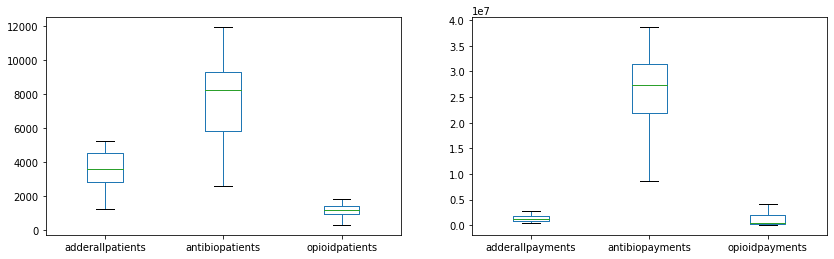

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14,4), squeeze=False)
df1_d.loc[:,['adderallpatients','antibiopatients','opioidpatients']].plot(kind='box', ax=axes[0, 0])
df1_d.loc[:,['adderallpayments','antibiopayments','opioidpayments']].plot(kind='box', ax=axes[0, 1])

Covariance matrix of the different variables shows strong correlations between antibiopatients and antibiopayments suggesting no anomalous prescription patterns for antibiotics. However, the poor correlations between adderallpatients and adderallpayments as well as between opioidpatients and opioidpayments, suggests that something other than patient volume was driving the payment patterns for adderall and opioids

In [12]:
df1_d.describe() # Descriptive stats of time series data set

,adderallpatients,adderallpayments,antibiopatients,antibiopayments,opioidpatients,opioidpayments
count,33.000000,3.300000e+01,33.000000,3.300000e+01,33.000000,3.300000e+01
mean,3562.878788,1.323731e+06,7697.818182,2.615008e+07,1180.696970,1.136824e+06
std,1135.261032,6.695727e+05,2299.755292,7.857188e+06,391.772453,1.151319e+06
min,1257.000000,3.502910e+05,2604.000000,8.705042e+06,317.000000,5.252700e+04
25%,2834.000000,8.350750e+05,5804.000000,2.194269e+07,979.000000,3.105330e+05
50%,3621.000000,1.163625e+06,8219.000000,2.740240e+07,1188.000000,5.038210e+05
75%,4533.000000,1.870856e+06,9274.000000,3.139256e+07,1453.000000,2.045791e+06
max,5255.000000,2.862942e+06,11918.000000,3.863070e+07,1855.000000,4.092837e+06


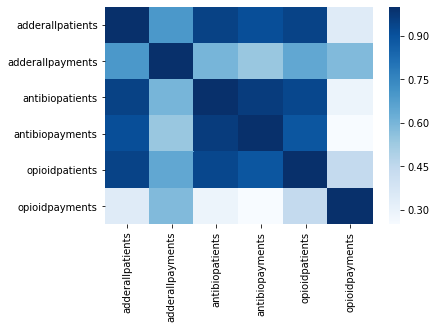

In [13]:
df1_corr = df1_d.corr()
sns.heatmap(df1_corr, cmap='Blues')

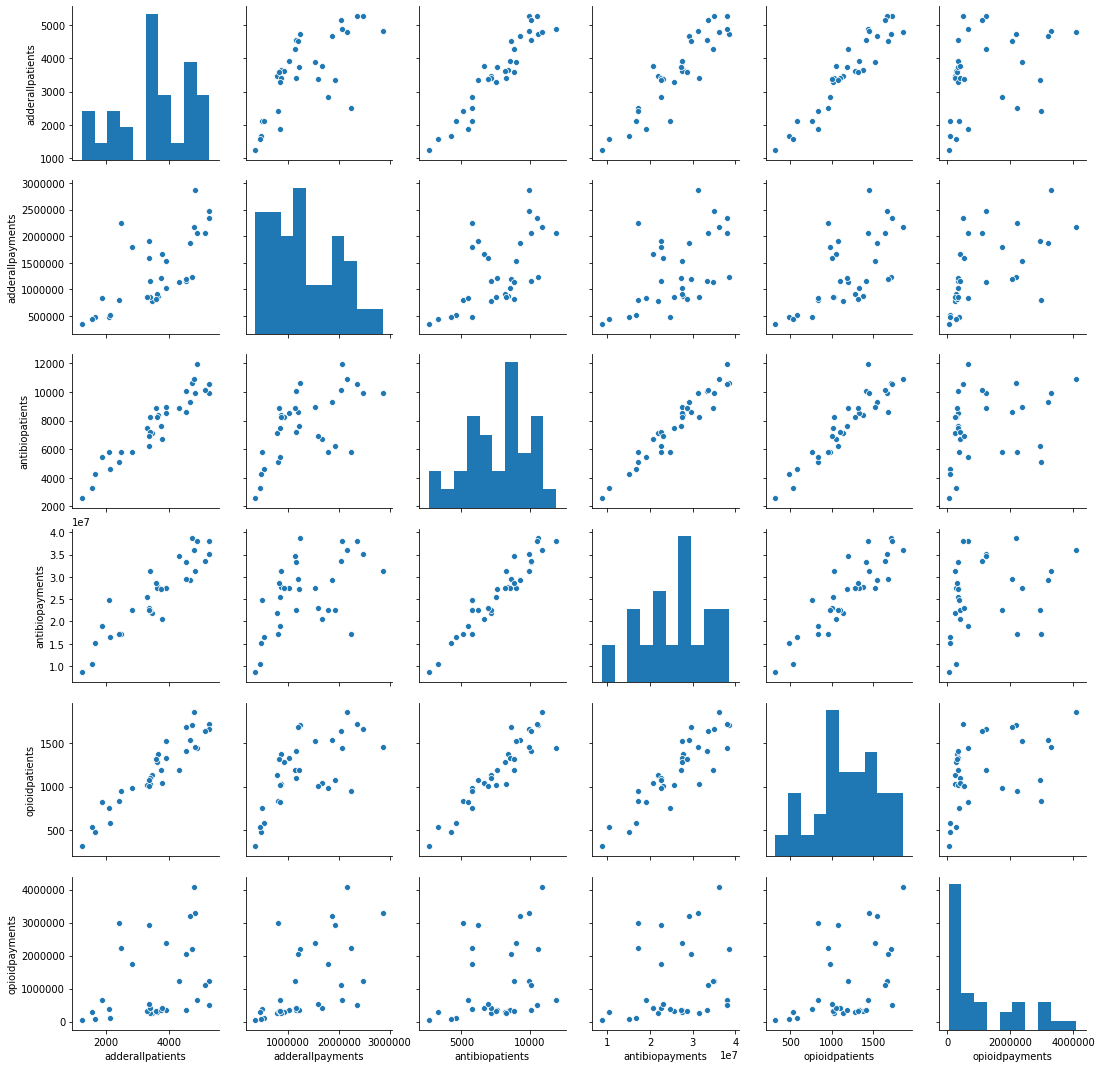

In [14]:
sns.pairplot(df1_d) # Showing scatter plots of paired variables

### Investigating payment received per patient per drug type
Investigating the average payments per patient per physician suggests there were more repeat patients for antibiotics and opioids compared to adderall

In [15]:
df1_p = df1.groupby('physicianid').sum() # Sumarizing the dataframe by physicianid
df1_p.shape

(3010, 6)

In [16]:
# Creating three new columns to capture the average payments received per patient per physician per drug type
df1_p['adderall_pay_rate'] = df1_p['adderallpayments'] / df1_p['adderallpatients']
df1_p['antibio_pay_rate'] = df1_p['antibiopayments'] / df1_p['antibiopatients']
df1_p['opioid_pay_rate'] = df1_p['opioidpayments'] / df1_p['opioidpatients']

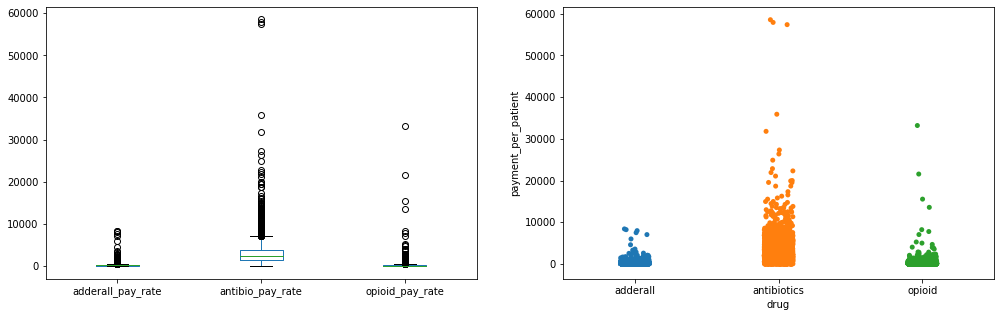

In [17]:
# Box and strip plots to capture the payments received per patient per physician per drug type

fig, axes = plt.subplots(1, 2, figsize=(17,5), squeeze=False)

df1_pmelt = df1_p.loc[:,['adderall_pay_rate','antibio_pay_rate','opioid_pay_rate']]
df1_pmelt.columns = ['adderall','antibiotics','opioid']
df1_pmelt = df1_pmelt.melt(var_name = 'drug', value_name ='payment_per_patient')
#sns.violinplot(x='drug', y='payment_per_patient', data = df1_pmelt, inner=None, color='lightgray', ax=axes[0, 1])
sns.stripplot(x='drug', y='payment_per_patient', data = df1_pmelt, size=5, jitter=True, ax=axes[0, 1])
df1_p.loc[:,['adderall_pay_rate','antibio_pay_rate','opioid_pay_rate']].plot(kind='box', ax=axes[0, 0])

In [18]:
# Descriptive stats of payments received per patient per physician per drug type
df1_p.loc[:,['adderall_pay_rate','antibio_pay_rate','opioid_pay_rate']].describe()

,adderall_pay_rate,antibio_pay_rate,opioid_pay_rate
count,2769.000000,2989.000000,2448.000000
mean,242.866021,3086.964647,252.688357
std,436.271818,3225.538837,994.143040
min,-83.066667,0.000000,0.000000
25%,99.333333,1514.247863,61.437500
50%,165.280000,2513.442529,127.470000
75%,257.846154,3779.720000,227.236364
max,8400.000000,58537.333333,33180.888462


### ANOVA test to compare pay rates

In [19]:
# ANOVA test using adderall pay rate as baseline / intercept
results = ols('payment_per_patient ~ C(drug)', data=df1_pmelt).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     payment_per_patient   R-squared:                       0.310
Model:                             OLS   Adj. R-squared:                  0.310
Method:                  Least Squares   F-statistic:                     1846.
Date:                 Sat, 10 Aug 2019   Prob (F-statistic):               0.00
Time:                         18:17:49   Log-Likelihood:                -74165.
No. Observations:                 8206   AIC:                         1.483e+05
Df Residuals:                     8203   BIC:                         1.484e+05
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                242.8660     38.708      6.274      0.000     166.989     318.743
C(drug)[T.antibiotics]  2844.0986     53.725     52.938      0.000    2738.785    2949.412
C(drug)[T.opioid]          9.8223     56.507      0.174      0.862    -100.946     120.591
==============================================================================
Omnibus:                    13643.090   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18341050.788
Skew:                          10.972   Prob(JB):                         0.00
Kurtosis:                     233.565   Cond. No.                         3.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Subsetting the dataframe to further investigate prescription patterns
#### Subset of physicians that prescribed adderall and atleast one other drug type

In [20]:
# Physicians that prescribed adderall and atleast one other drug type
adderall_phys_other = df1[df1['adderallpatients'].notnull() & (df1['antibiopatients'].notnull() | df1['opioidpatients'].notnull())]
adderall_phys_other.shape

(23856, 7)

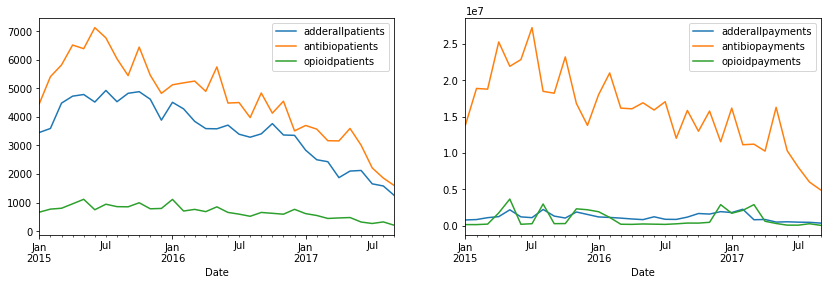

In [21]:
adderall_phys_other = adderall_phys_other.loc[:'2017-09',:].groupby('Date').sum()
fig, axes = plt.subplots(1, 2, figsize=(14,4), squeeze=False)
adderall_phys_other.loc[:,['adderallpatients','antibiopatients','opioidpatients']].plot(ax=axes[0, 0])
adderall_phys_other.loc[:,['adderallpayments','antibiopayments','opioidpayments']].plot(ax=axes[0, 1])

Box plots of total patients and payments per month for physicians that prescribed adderall and atleast one other drug type suggest an even higher revenue margin from opioids compared to adderall

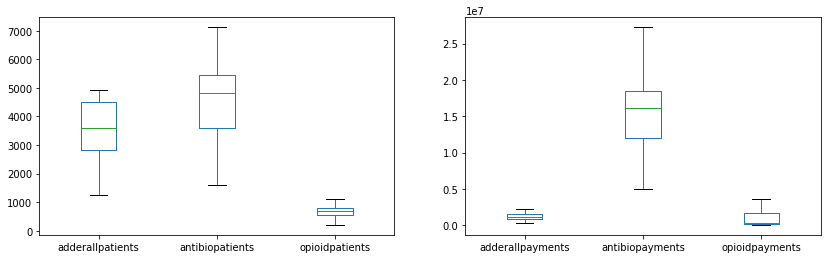

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14,4), squeeze=False)
adderall_phys_other.loc[:,['adderallpatients','antibiopatients','opioidpatients']].plot(kind='box', ax=axes[0, 0])
adderall_phys_other.loc[:,['adderallpayments','antibiopayments','opioidpayments']].plot(kind='box', ax=axes[0, 1])

Closer look at adderallpyaments and opioidpayments for physicians prescribed adderall and atleast one other drug

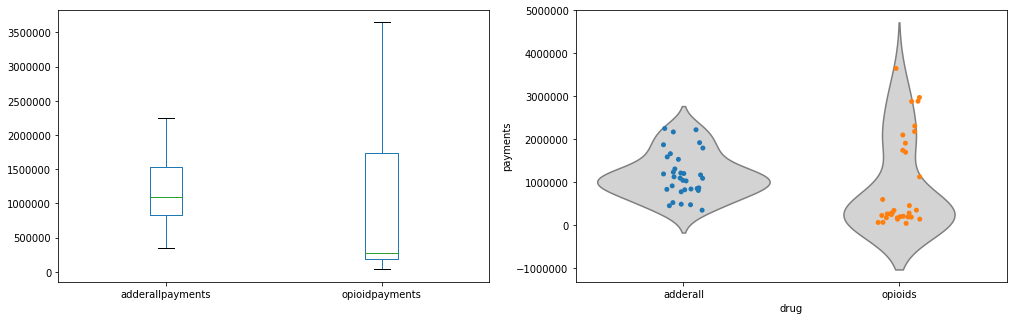

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(17,5), squeeze=False)

adderall_other_melt = adderall_phys_other.loc[:,['adderallpayments','opioidpayments']]
adderall_other_melt.columns = ['adderall', 'opioids']
adderall_other_melt = adderall_other_melt.melt(var_name = 'drug', value_name ='payments')
sns.violinplot(x='drug', y='payments', data = adderall_other_melt, inner=None, color='lightgray', ax=axes[0, 1])
sns.stripplot(x='drug', y='payments', data = adderall_other_melt, size=5, jitter=True, ax=axes[0, 1])

adderall_phys_other.loc[:,['adderallpayments','opioidpayments']].plot(kind='box', ax=axes[0, 0])

#### Subset of physicians that prescribed opioids and atleast one other drug type

In [24]:
# Physicians that prescribed opioids and atleast one other drug type
opioid_phys_other = df1[df1['opioidpatients'].notnull() & (df1['antibiopatients'].notnull() | df1['adderallpatients'].notnull())]
opioid_phys_other.shape

(11898, 7)

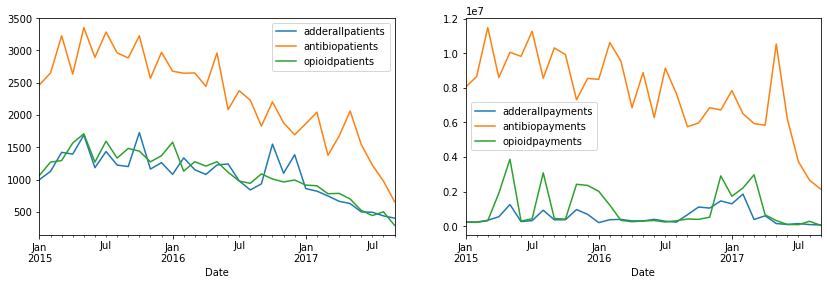

In [25]:
opioid_phys_other = opioid_phys_other.loc[:'2017-09',:].groupby('Date').sum()
fig, axes = plt.subplots(1, 2, figsize=(14,4), squeeze=False)
opioid_phys_other.loc[:,['adderallpatients','antibiopatients','opioidpatients']].plot(ax=axes[0, 0])
opioid_phys_other.loc[:,['adderallpayments','antibiopayments','opioidpayments']].plot(ax=axes[0, 1])

Box plots of total patients and payments per month for physicians that prescribed opioids and atleast one other drug type suggests no difference in revenue margin from opioids compared to adderall


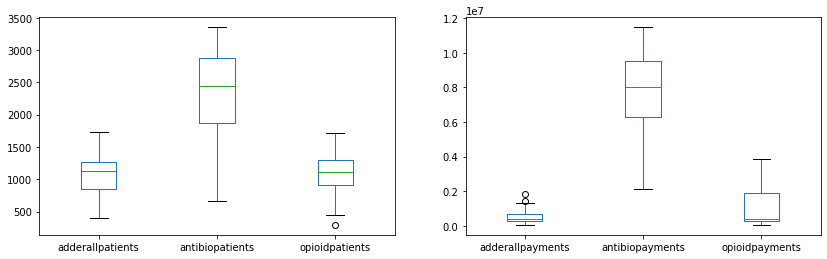

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14,4), squeeze=False)
opioid_phys_other.loc[:,['adderallpatients','antibiopatients','opioidpatients']].plot(kind='box', ax=axes[0, 0])
opioid_phys_other.loc[:,['adderallpayments','antibiopayments','opioidpayments']].plot(kind='box', ax=axes[0, 1])

Closer look at adderallpyaments and opioidpayments for physicians that prescribed opioids and atleast one other drug


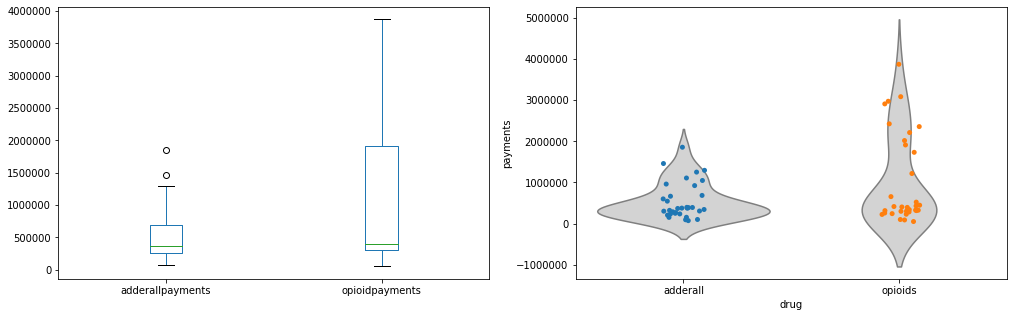

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(17,5), squeeze=False)

opioid_other_melt = opioid_phys_other.loc[:,['adderallpayments','opioidpayments']]
opioid_other_melt.columns = ['adderall', 'opioids']
opioid_other_melt = opioid_other_melt.melt(var_name = 'drug', value_name ='payments')
sns.violinplot(x='drug', y='payments', data = opioid_other_melt, inner=None, color='lightgray', ax=axes[0, 1])
sns.stripplot(x='drug', y='payments', data = opioid_other_melt, size=5, jitter=True, ax=axes[0, 1])

opioid_phys_other.loc[:,['adderallpayments','opioidpayments']].plot(kind='box', ax=axes[0, 0])

### Subset of physicians that prescribed only adderall and opioids
This was a surprisingly small subset of physicians; only 9 out of 3010 physicians

In [28]:
# Physicians that prescribed only adderall and opioids
adderall_opioid_phys = df1[df1['adderallpatients'].notnull() & df1['antibiopatients'].isnull() & df1['opioidpatients'].notnull()]
adderall_opioid_phys.shape

(9, 7)

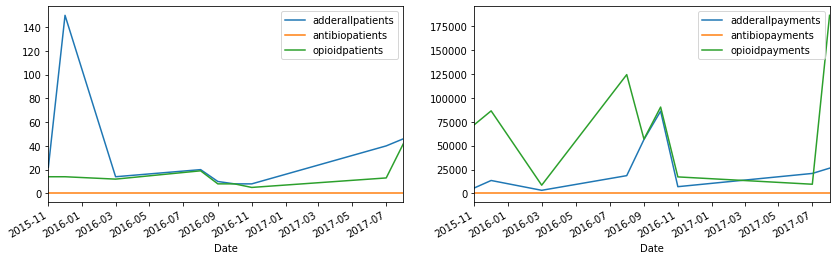

In [29]:
adderall_opioid_phys = adderall_opioid_phys.loc[:'2017-09',:].groupby('Date').sum()
fig, axes = plt.subplots(1, 2, figsize=(14,4), squeeze=False)
adderall_opioid_phys.loc[:,['adderallpatients','antibiopatients','opioidpatients']].plot(ax=axes[0, 0])
adderall_opioid_phys.loc[:,['adderallpayments','antibiopayments','opioidpayments']].plot(ax=axes[0, 1])

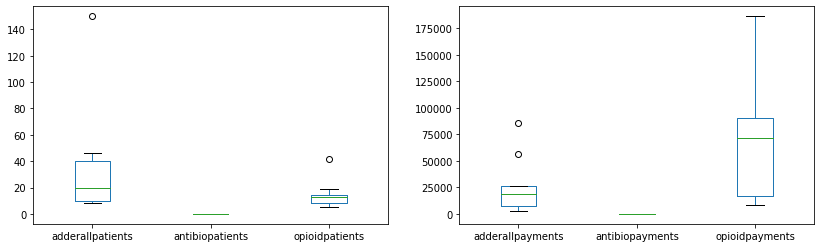

In [30]:
# Box plots of total patients and payments per month for physicians that prescribed only adderall and opioids
fig, axes = plt.subplots(1, 2, figsize=(14,4), squeeze=False)
adderall_opioid_phys.loc[:,['adderallpatients','antibiopatients','opioidpatients']].plot(kind='box', ax=axes[0, 0])
adderall_opioid_phys.loc[:,['adderallpayments','antibiopayments','opioidpayments']].plot(kind='box', ax=axes[0, 1])

***
## Dataset 2

Importing datasets, concatenating and storing as dataframe df2

In [31]:
filenames = glob('partd/PartD*.txt')
years = [2014, 2015, 2016, 2017]
dataframes = []
chunk = 10**5
for year,filename in zip(years,filenames):
    reader = pd.read_csv(filename, sep='\t', chunksize = chunk)
    for chunk_df in reader:
        chunk_df['year'] = year
        chunk_df['id'] = chunk_df[['npi','year']].apply(lambda x: '_'.join(str(value) for value in x), axis=1)
        chunk_df = chunk_df.drop(['npi','year'], axis=1)
        dataframes.append(chunk_df)

df2 = pd.concat(dataframes, sort=False)

In [32]:
df2 = df2.set_index('id')

In [33]:
df2.shape

(4469679, 83)

In [34]:
df2.head()

,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,...,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
id,,,,,,,,,,,,,,,,,,,,,
1003000126_2014,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,21502.0,...,104.0,227.0,NaN,NaN,NaN,0.0,NaN,144.0,94.0,2.0266
1003000142_2014,KHALIL,RASHID,NaN,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,...,65.0,95.0,NaN,0.0,NaN,0.0,NaN,64.0,82.0,1.6538
1003000159_2014,VOGES,MARSHA,S,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003000167_2014,ESCOBAR,JULIO,E,DDS,M,I,5 PINE CONE RD,NaN,DAYTON,89403.0,...,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,1.3362
1003000282_2014,BLAKEMORE,ROSIE,K,FNP,F,I,TENNESSEE PRISON FOR WOMEN,3881 STEWARTS LANE,NASHVILLE,37243.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4469679 entries, 1003000126_2014 to 1992999882_2017
Data columns (total 83 columns):
nppes_provider_last_org_name        object
nppes_provider_first_name           object
nppes_provider_mi                   object
nppes_credentials                   object
nppes_provider_gender               object
nppes_entity_code                   object
nppes_provider_street1              object
nppes_provider_street2              object
nppes_provider_city                 object
nppes_provider_zip5                 float64
nppes_provider_zip4                 float64
nppes_provider_state                object
nppes_provider_country              object
specialty_description               object
description_flag                    object
medicare_prvdr_enroll_status        object
total_claim_count                   int64
total_30_day_fill_count             float64
total_drug_cost                     float64
total_day_supply                    int64
bene_cou

In [36]:
# Initial exploratory statistical analysis to investigate outliers
df2.describe()

,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,...,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
count,4.469445e+06,3.950273e+06,4.469679e+06,4.469679e+06,4.469679e+06,4.469679e+06,3.935246e+06,3.499596e+06,3.499596e+06,3.499596e+06,...,3.101946e+06,2.080544e+06,1.477303e+06,1.984060e+06,1.541327e+06,3.227753e+06,1.452348e+06,2.589176e+06,2.589176e+06,3.935246e+06
mean,4.806602e+04,3.781267e+03,1.305766e+03,1.942933e+03,1.251362e+05,5.389819e+04,1.540157e+02,1.268990e+03,1.986144e+03,1.077771e+05,...,7.681676e+01,1.720787e+02,2.911609e+01,4.642288e+00,2.622565e+01,2.370782e-01,1.282276e+00,1.451119e+02,6.510854e+01,1.476258e+00
std,3.031069e+04,2.251558e+03,3.139943e+03,4.547981e+03,3.380184e+05,1.276015e+05,1.985465e+02,2.857082e+03,4.317755e+03,2.542062e+05,...,9.291940e+01,1.923222e+02,6.021685e+01,3.554039e+01,8.383361e+01,4.114569e+00,6.399938e+00,1.745935e+02,8.462852e+01,6.804732e-01
min,0.000000e+00,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.989000e-01
25%,2.120100e+04,2.048000e+03,5.300000e+01,6.200000e+01,1.582115e+03,9.550000e+02,3.300000e+01,6.800000e+01,8.000000e+01,2.186157e+03,...,2.300000e+01,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.700000e+01,2.000000e+01,1.068100e+00
50%,4.504000e+04,3.339000e+03,1.980000e+02,2.323000e+02,9.928970e+03,4.514000e+03,8.400000e+01,2.350000e+02,2.878000e+02,1.341678e+04,...,4.700000e+01,1.120000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.700000e+01,4.000000e+01,1.307000e+00
75%,7.670500e+04,5.147000e+03,9.930000e+02,1.353600e+03,9.640037e+04,3.645700e+04,2.050000e+02,1.074000e+03,1.573200e+03,1.001162e+05,...,9.700000e+01,2.380000e+02,3.400000e+01,0.000000e+00,2.300000e+01,0.000000e+00,0.000000e+00,1.950000e+02,7.900000e+01,1.679100e+00
max,9.992900e+04,9.999000e+03,4.472880e+05,4.479605e+05,2.645885e+07,5.634058e+06,3.996500e+04,3.791620e+05,3.797510e+05,1.342742e+07,...,1.655700e+04,2.531600e+04,3.592000e+03,4.309000e+03,1.135300e+04,4.020000e+02,9.950000e+02,2.813900e+04,1.182600e+04,1.164220e+01


Initial removal of unnecessary character columns (example street address, names, middle initials and flags) based on instructions and recommendations from the data source documentation https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Prescriber_Methods.pdf

This process may be repeated when columns are further analyzed for redundancy and relevancy to the response variable

In [37]:
# Removing unnecessary columns from the dataframe
pattern1 = re.compile('suppress')
pattern2 = re.compile('nppes')
to_remove = [i for i in df2.columns if pattern1.findall(i) or pattern2.findall(i)] + ['description_flag']
to_remove = [i for i in to_remove if i not in ('nppes_provider_gender','nppes_provider_zip5','nppes_provider_state')]

to_remove # List of columns to be removed

['nppes_provider_last_org_name',
 'nppes_provider_first_name',
 'nppes_provider_mi',
 'nppes_credentials',
 'nppes_entity_code',
 'nppes_provider_street1',
 'nppes_provider_street2',
 'nppes_provider_city',
 'nppes_provider_zip4',
 'nppes_provider_country',
 'ge65_suppress_flag',
 'bene_count_ge65_suppress_flag',
 'brand_suppress_flag',
 'generic_suppress_flag',
 'other_suppress_flag',
 'mapd_suppress_flag',
 'pdp_suppress_flag',
 'lis_suppress_flag',
 'nonlis_suppress_flag',
 'antipsych_ge65_suppress_flag',
 'antipsych_bene_ge65_suppress_flg',
 'description_flag']

In [38]:
df3 = df2.drop(to_remove,axis=1)

In [39]:
df3.shape # Checking the shape of the reduced dataframe to show number of columns is now 61

(4469679, 61)

In [40]:
df3.isnull().sum() # Checking for number of null values within columns

nppes_provider_gender                    63
nppes_provider_zip5                     234
nppes_provider_state                      0
specialty_description                     0
medicare_prvdr_enroll_status              0
total_claim_count                         0
total_30_day_fill_count                   0
total_drug_cost                           0
total_day_supply                          0
bene_count                           534433
total_claim_count_ge65               970083
total_30_day_fill_count_ge65         970083
total_drug_cost_ge65                 970083
total_day_supply_ge65                970083
bene_count_ge65                     1974093
brand_claim_count                   1890317
brand_drug_cost                     1890317
generic_claim_count                 1213086
generic_drug_cost                   1213086
other_claim_count                   1057739
other_drug_cost                     1057739
mapd_claim_count                     916342
mapd_drug_cost                  

The 'nppes_provider_zip5' missing values are associated with non-US claims. The zip code will be imputed with the integer '99999' and the non-US countries will be replaced with 'non-US'. 

Likewise, the 'nppes_provider_gender' column has 63 null values, which are associated with npis that are not actual physicians but institutions. Hence, the missing gender entries will be replaced with the string 'X'.

In [41]:
# Imputing the string 'X' for missing 'nppes_provider_gender' entries
df3['nppes_provider_gender'].fillna('X', inplace=True)

# Imputing the integer '99999' for missing 'nppes_provider_zip5' entries and converting values to string    
df3['nppes_provider_zip5'].fillna(99999, inplace=True)
df3['nppes_provider_zip5'] = df3['nppes_provider_zip5'].map(lambda x: str(x))

Except for 'opioid_prescriber_rate', 'la_opioid_prescriber_rate', 'average_age_of_beneficiaries' and 'beneficiary_average_risk_score' columns, the missing values in the numerical columns were generally missing at random and typically occur when the Medicare PartD total claim or total beneficiary count was less than 11 (i.e. between 1 and 10) as well as when a subcategory member count was less than 11. Subcategories columns are columns whose cumulative sum make up the primary total column. 

For example brand_claim_count, generic_claim_count and other_claim_count are subcategories of total_claim_count. Additionally, mapd_claim_count and pdp_claim_count are also subcategories of total_claim_count. They describe the proportions of total claims associated with Medicare Advantage Prescription Drug (MAPD) plan or Medicare Part D Prescription Drug (PDP) plan, respectively.

The total_claim_count was never null. However, in situations where the bene_count was less than 11 the missing values were imputed with the integer '5' as recommended by the documentation that accompanied the data source.

Since the subcategory counts and costs aggregates are fractions of the corresponding totals, the average proportions of each subcategory relative to its corresponding total was calculated and this value was used in the imputation of missing subcategory values. A data frame, df_sub (about 150,000 rows) containing rows with > 57 non-null values was subsetted and used to calculate the average proportions of each subcategory relative to its corresponding total.

In [42]:
# Imputing the integer '5' for missing entries in 'bene_count' 
df3['bene_count'].fillna(5, inplace=True)

In [43]:
# Creating a subset dataframe (df_sub) of rows with non-missing values > 57 out of 61
df_sub = df3[df3.notnull().sum(axis=1) > 57]

In [44]:
# df_sub was exported as a csv file. The average subcategory proportions was calculated using excel 
# and the file was re-imported as a new dataframe, 'multiplier.xlsx' 

# importing the file containing the calculated proportion values into a new dataframe, impute
impute = pd.read_excel('data/df_sub_props.xlsx', sheet_name='Sheet1')
impute.columns = ['column_names','ref_total','multiplier']
impute['ref_total'] = impute['ref_total'].map(lambda x: x.strip())

#### Explanation of how the impute dataframe will be used to impute values:
Using 'brand_claim_count' (row 5 in the impute dataframe below), the ref_total is 'total_claim_count', and the multiplier is 0.208034. This means that on average, brand_claim_count represents about 21% of the total_claim_counts per physician. Hence, missing brand_claim_counts will be imputed as multiplier * total_claim_count for that row.

In [45]:
impute

,column_names,ref_total,multiplier
0,total_claim_count_ge65,total_claim_count,0.826511
1,total_30_day_fill_count_ge65,total_30_day_fill_count,0.849652
2,total_drug_cost_ge65,total_drug_cost,0.772285
3,total_day_supply_ge65,total_day_supply,0.852593
4,bene_count_ge65,bene_count,0.841039
5,brand_claim_count,total_claim_count,0.208034
6,brand_drug_cost,total_drug_cost,0.743894
7,generic_claim_count,total_claim_count,0.783205
8,generic_drug_cost,total_drug_cost,0.251573
9,other_claim_count,total_claim_count,0.008761


In [46]:
df4 = df3.copy() # Creating a copy of the df before imputation of subcategory columns

In [47]:
# Imputation of missing subcategory numerical columns based on calculated multipliers

for column_name, total_count, multiplier in zip(impute['column_names'], impute['ref_total'], impute['multiplier']):
    col_list = [(j * multiplier) if str(i) == 'nan' else i for i,j in zip(df4[column_name],df4[total_count])]
    df4[column_name] = col_list

In [48]:
# Randomly selecting columns to inspect imputation method for accuracy by comparing df2 and df2_clean dataframes
sub_cat = 'brand_claim_count'
total = 'total_claim_count'

print('{:<25} {:<30} {}'.format('df3_' + sub_cat, 'df4_' + sub_cat, total))
for i,j,k in zip(df3[sub_cat][:20], df4[sub_cat][:20], df3[total][:20]):
    print('{:<25} {:<30} {}'.format(i,j,k))    

df3_brand_claim_count     df4_brand_claim_count          total_claim_count
124.0                     124.0                          675
116.0                     116.0                          937
nan                       3.7446147192917034             18
0.0                       0.0                            58
0.0                       0.0                            14
nan                       87.37434345013975              420
nan                       24.13196152432431              116
nan                       13.938288121808007             67
967.0                     967.0                          5408
884.0                     884.0                          5503
nan                       16.01862963252562              77
nan                       10.817775855731588             52
nan                       250.4731178904006              1204
nan                       28.084610394687775             135
680.0                     680.0                          3347
153.0       

In [49]:
# Checking the percentage of null values in the non-subcategory numerical columns
df4.loc[:,['opioid_prescriber_rate', 'la_opioid_prescriber_rate', 
    'average_age_of_beneficiaries','beneficiary_average_risk_score']].isnull().mean() * 100

opioid_prescriber_rate            28.642616
la_opioid_prescriber_rate         40.837877
average_age_of_beneficiaries      11.956854
beneficiary_average_risk_score    11.956854
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226EE360CF8>,
      dtype=object)

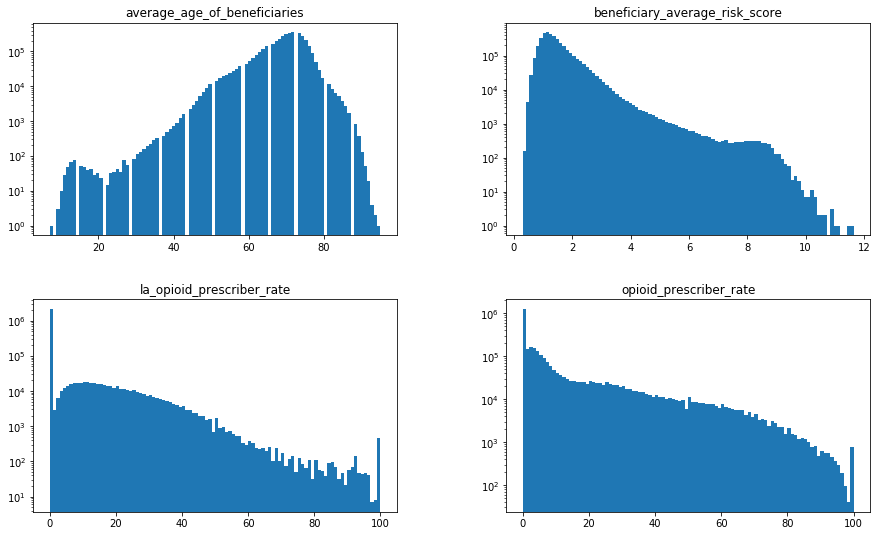

In [50]:
# Checking the frequency distribution of values in the non-subcategory numerical columns
df4.loc[:,['opioid_prescriber_rate','la_opioid_prescriber_rate','average_age_of_beneficiaries',
           'beneficiary_average_risk_score']].hist(bins=100, figsize=(15,9), grid=False, log=True)

In [51]:
# Identifying columns in the dataset with the highest correlations to the non-subcategory numerical columns
df4_corr = df4.corr()
df4_corr = df4_corr.apply(lambda x: abs(x))

collection = {}
for col in df4_corr.index:
    collection[col] = (max([i for i in df4_corr[col] if i!= 1]), df4_corr[col].drop(df4_corr[col].idxmax()).idxmax())

high_corr = pd.DataFrame([collection]).T
high_corr['r'] = [i[0] for i in high_corr[0]]
high_corr['col_r'] = [i[1] for i in high_corr[0]]
del high_corr[0]
high_corr.drop_duplicates('r', inplace=True)
high_corr.sort_values('r', ascending=False, inplace=True)
high_corr.loc[['opioid_prescriber_rate', 'la_opioid_prescriber_rate', 
              'average_age_of_beneficiaries', 'beneficiary_average_risk_score']]

,r,col_r
opioid_prescriber_rate,0.362355,opioid_bene_count
la_opioid_prescriber_rate,0.420322,la_opioid_claim_count
average_age_of_beneficiaries,0.291846,beneficiary_age_greater_84_count
beneficiary_average_risk_score,0.104275,lis_drug_cost


The columns, 'opioid_prescriber_rate', 'la_opioid_prescriber_rate', 'average_age_of_beneficiaries' and 'beneficiary_average_risk_score' were not very correlated to any of the other columns in the dataset. Hence, regression will not be used for used for imputation. Column means will be used instead. However, with over 35% null values in 'la_opioid_prescriber_rate', 10% of the total rows in the dataframe will be deleted. The delected rows will consist of randomly selected rows with null 'la_opioid_prescriber_rate' values. 

In [52]:
# Deletion of a fraction of rows with null 'la_opioid_prescriber_rate' values and saving the reduced dataframe as df5
n = int(len(df4)*0.1)
df_del = df4[df4['la_opioid_prescriber_rate'].isnull()].sample(n=n)
df5 = df4.loc[~df4.index.isin(df_del.index)]
df5.shape

(4022712, 61)

In [53]:
# Checking the percentage of null values in the non-subcategory numerical columns of the reduced dataframe, df5
df5.loc[:,['opioid_prescriber_rate', 'la_opioid_prescriber_rate', 
    'average_age_of_beneficiaries','beneficiary_average_risk_score']].isnull().mean() * 100

opioid_prescriber_rate            31.105334
la_opioid_prescriber_rate         34.264322
average_age_of_beneficiaries      10.951194
beneficiary_average_risk_score    10.951194
dtype: float64

Comparing descriptive statistics of df4 and df5 to make sure there are no major differences due to row deletion

In [54]:
df4.loc[:,['opioid_prescriber_rate', 'la_opioid_prescriber_rate', 'average_age_of_beneficiaries', 
           'beneficiary_average_risk_score']].describe()

,opioid_prescriber_rate,la_opioid_prescriber_rate,average_age_of_beneficiaries,beneficiary_average_risk_score
count,3.189446e+06,2.644357e+06,3.935246e+06,3.935246e+06
mean,1.111902e+01,3.449097e+00,6.916635e+01,1.476258e+00
std,1.742129e+01,9.261543e+00,6.142722e+00,6.804732e-01
min,0.000000e+00,0.000000e+00,7.000000e+00,2.989000e-01
25%,0.000000e+00,0.000000e+00,6.600000e+01,1.068100e+00
50%,3.100000e+00,0.000000e+00,7.000000e+01,1.307000e+00
75%,1.447000e+01,0.000000e+00,7.300000e+01,1.679100e+00
max,1.000000e+02,1.000000e+02,9.500000e+01,1.164220e+01


In [55]:
df5.loc[:,['opioid_prescriber_rate', 'la_opioid_prescriber_rate', 'average_age_of_beneficiaries', 
           'beneficiary_average_risk_score']].describe()

,opioid_prescriber_rate,la_opioid_prescriber_rate,average_age_of_beneficiaries,beneficiary_average_risk_score
count,2.771434e+06,2.644357e+06,3.582177e+06,3.582177e+06
mean,1.213959e+01,3.449097e+00,6.918015e+01,1.472762e+00
std,1.789180e+01,9.261543e+00,6.065071e+00,6.782648e-01
min,0.000000e+00,0.000000e+00,7.000000e+00,3.044000e-01
25%,0.000000e+00,0.000000e+00,6.600000e+01,1.067200e+00
50%,3.920000e+00,0.000000e+00,7.000000e+01,1.304600e+00
75%,1.724000e+01,0.000000e+00,7.300000e+01,1.672500e+00
max,1.000000e+02,1.000000e+02,9.400000e+01,1.164220e+01


Using column means to impute null entries in 'opioid_prescriber_rate','la_opioid_prescriber_rate','average_age_of_beneficiaries' and 'beneficiary_average_risk_score'

In [56]:
df5['opioid_prescriber_rate'].fillna(df5['opioid_prescriber_rate'].mean(), inplace=True)
df5['la_opioid_prescriber_rate'].fillna(df5['la_opioid_prescriber_rate'].mean(), inplace=True)
df5['average_age_of_beneficiaries'].fillna(df5['average_age_of_beneficiaries'].mean(), inplace=True)
df5['beneficiary_average_risk_score'].fillna(df5['beneficiary_average_risk_score'].mean(), inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [57]:
df5.isnull().sum().sum() == 0 # Confirming that all columns no longer have null values

True

Adding a new column, 'npi_type_pref' and 'npi_drug_pref', to capture prescription type preference (brand or generic) or prescription drug preference (opioid, antibiotic, antipsych) per physician per year 

In [58]:
npi_type_pref, npi_drug_pref = [],[]
    
for i,j,k,l,m,n,o in zip(df5['total_claim_count'],df5['brand_claim_count'],
                         df5['generic_claim_count'],df5['opioid_claim_count'],
                         df5['la_opioid_claim_count'],df5['antibiotic_claim_count'],
                         df5['antipsych_claim_count_ge65']):
    a = [j/i, k/i]
    b = [l/i, m/i, n/i, o/i]
            
    if a[0] == a[1]:
        npi_type_pref.append('no_pref')
    elif a[0] > a[1]:
        npi_type_pref.append('brand')
    else:
        npi_type_pref.append('generic')
            
    maxb = [index for index,value in enumerate(b) if max(b) == value] 
    if len(maxb) > 1:
        npi_drug_pref.append('no_pref')
    else:
        if maxb[0] == 0:
            npi_drug_pref.append('opioid')
        elif maxb[0] == 1:
            npi_drug_pref.append('la_opioid')
        elif maxb[0] == 2:
            npi_drug_pref.append('antibiotic')
        elif maxb[0] == 3:
            npi_drug_pref.append('antipsych')        
            
df5['npi_type_pref'], df5['npi_drug_pref']  = npi_type_pref, npi_drug_pref 
df5.shape                               

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(4022712, 63)

In [59]:
# Inspecting newly created columns
df5['npi_type_pref'].value_counts(dropna=False)

generic    3873586
brand       145518
no_pref       3608
Name: npi_type_pref, dtype: int64

In [60]:
df5['npi_drug_pref'].value_counts(dropna=False)

antibiotic    1930962
opioid        1714634
no_pref        244582
antipsych      131881
la_opioid         653
Name: npi_drug_pref, dtype: int64

#### Visualizing the covariance matrix of a subset of variables

In [61]:
# Subsetting the variables
lst = ['opioid', 'generic', 'antipsych', 'brand', 'rate', 'antibiotic']
to_corr = []
for col in df5.columns:
    for i in lst:
        pattern = re.compile(i)
        if pattern.findall(col):
            to_corr.append(col)

to_corr = to_corr + ['opioid_prescriber_rate', 'la_opioid_prescriber_rate','average_age_of_beneficiaries',
           'beneficiary_average_risk_score']
to_corr

['brand_claim_count',
 'brand_drug_cost',
 'generic_claim_count',
 'generic_drug_cost',
 'opioid_claim_count',
 'opioid_drug_cost',
 'opioid_day_supply',
 'opioid_bene_count',
 'opioid_prescriber_rate',
 'opioid_prescriber_rate',
 'la_opioid_claim_count',
 'la_opioid_drug_cost',
 'la_opioid_day_supply',
 'la_opioid_bene_count',
 'la_opioid_prescriber_rate',
 'la_opioid_prescriber_rate',
 'antibiotic_claim_count',
 'antibiotic_drug_cost',
 'antibiotic_bene_count',
 'antipsych_claim_count_ge65',
 'antipsych_drug_cost_ge65',
 'antipsych_bene_count_ge65',
 'opioid_prescriber_rate',
 'la_opioid_prescriber_rate',
 'average_age_of_beneficiaries',
 'beneficiary_average_risk_score']

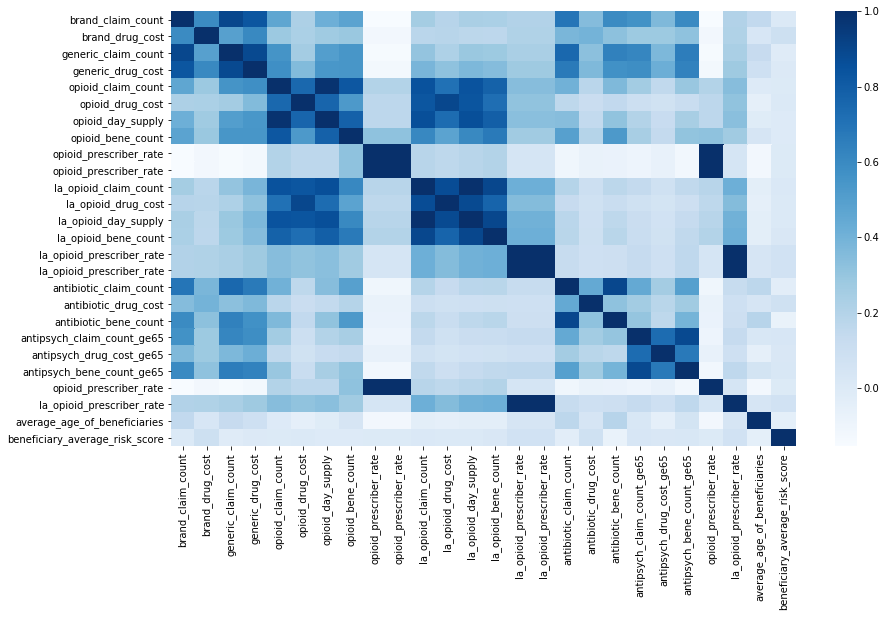

In [62]:
# Plotting the covariance matrix
df5_corr = df5.loc[:,to_corr].corr()
fig, axes = plt.subplots(1, 1, figsize=(14,8), squeeze=False)
sns.heatmap(df5_corr, cmap='Blues', ax=axes[0,0])